Descriptive Statistics:
       current_price    market_cap  total_volume      high_24h       low_24h  \
count   2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02   
mean    4.747616e+03  1.457257e+10  8.603799e+08  4.847659e+03  4.665635e+03   
std     2.049178e+04  1.296534e+11  6.127425e+09  2.090818e+04  2.011280e+04   
min     3.331000e-09  4.024035e+08  4.072000e+02  3.541000e-09  3.304000e-09   
25%     4.173285e-01  5.785945e+08  1.961567e+07  4.380358e-01  4.069800e-01   
50%     1.385000e+00  1.079356e+09  6.091506e+07  1.445000e+00  1.365000e+00   
75%     2.193750e+01  2.477987e+09  1.775910e+08  2.343750e+01  2.192750e+01   
max     1.007000e+05  1.993842e+12  7.931593e+10  1.025730e+05  9.897500e+04   

       price_change_percentage_24h  
count                   250.000000  
mean                     -0.792015  
std                       6.986598  
min                     -11.249650  
25%                      -2.679183  
50%                      -1.12848

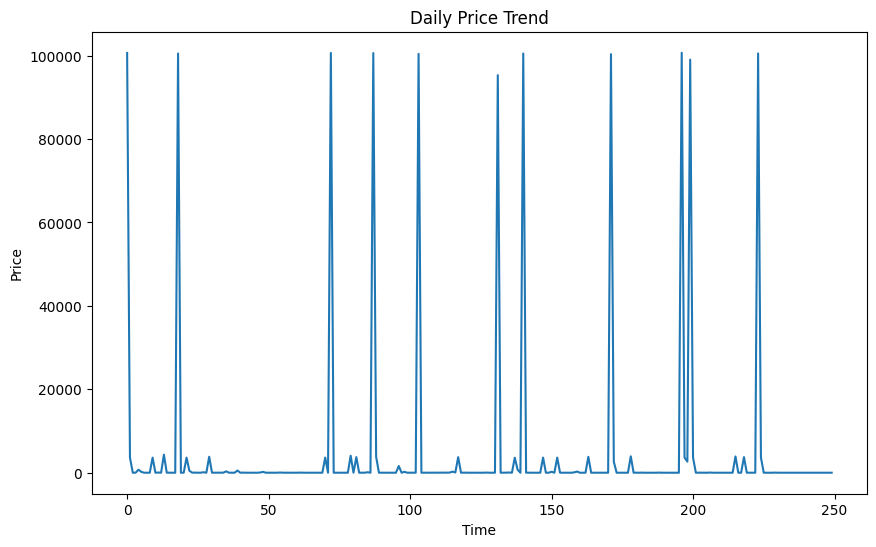

In [1]:

        import pandas as pd
        import matplotlib.pyplot as plt

        # Load data
        df = pd.read_csv("crypto_data_07-01-2025_18-11-46.csv")

        # Basic descriptive statistics
        print("Descriptive Statistics:")
        print(df.describe())

        # Plot price trends
        plt.figure(figsize=(10, 6))
        df['current_price'].plot(title="Daily Price Trend")
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.show()
        

c:\Users\ychow\anaconda3\envs\cryptoenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
18:18:27 - cmdstanpy - INFO - Chain [1] start processing
18:18:27 - cmdstanpy - INFO - Chain [1] done processing


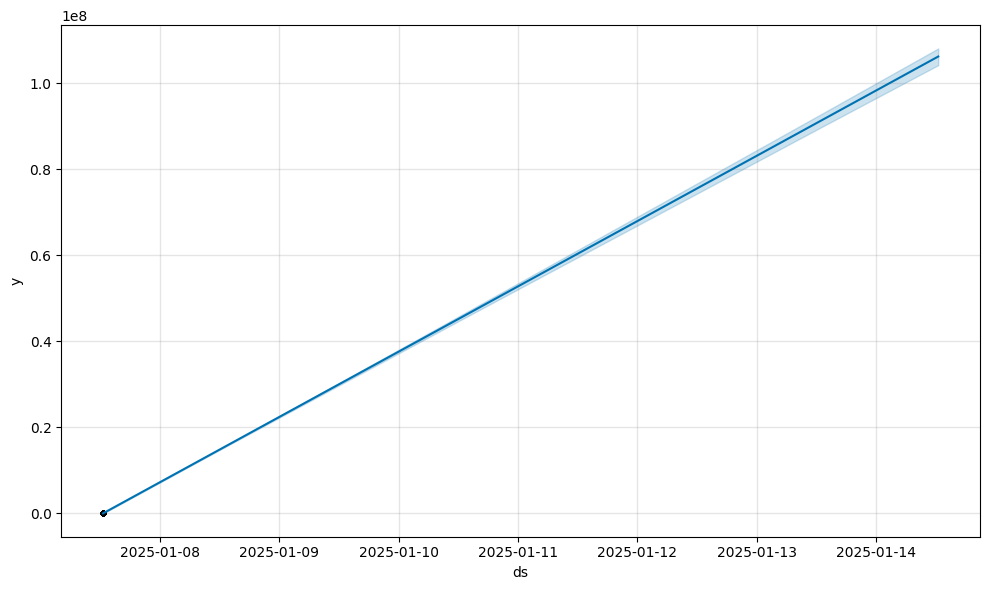

In [2]:

        from prophet import Prophet
        import pandas as pd

        # Prepare data for Prophet
        df['ds'] = pd.to_datetime(df['last_updated'])
        df['y'] = df['current_price']

        # Removing timezone from ds column before fitting
        df['ds'] = df['ds'].dt.tz_localize(None)
        
        # Train Prophet model
        model = Prophet()
        model.fit(df)

        # Forecast future values
        future = model.make_future_dataframe(periods=7)  # Predict the next 7 days
        forecast = model.predict(future)

        # Plot forecast
        fig = model.plot(forecast)
        